In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [75]:
data_df = pd.read_csv('AveragedTrial2.csv')
data_df.head()


,Time Elapsed (s),Voltage
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


Text(0, 0.5, 'v (m/s)')

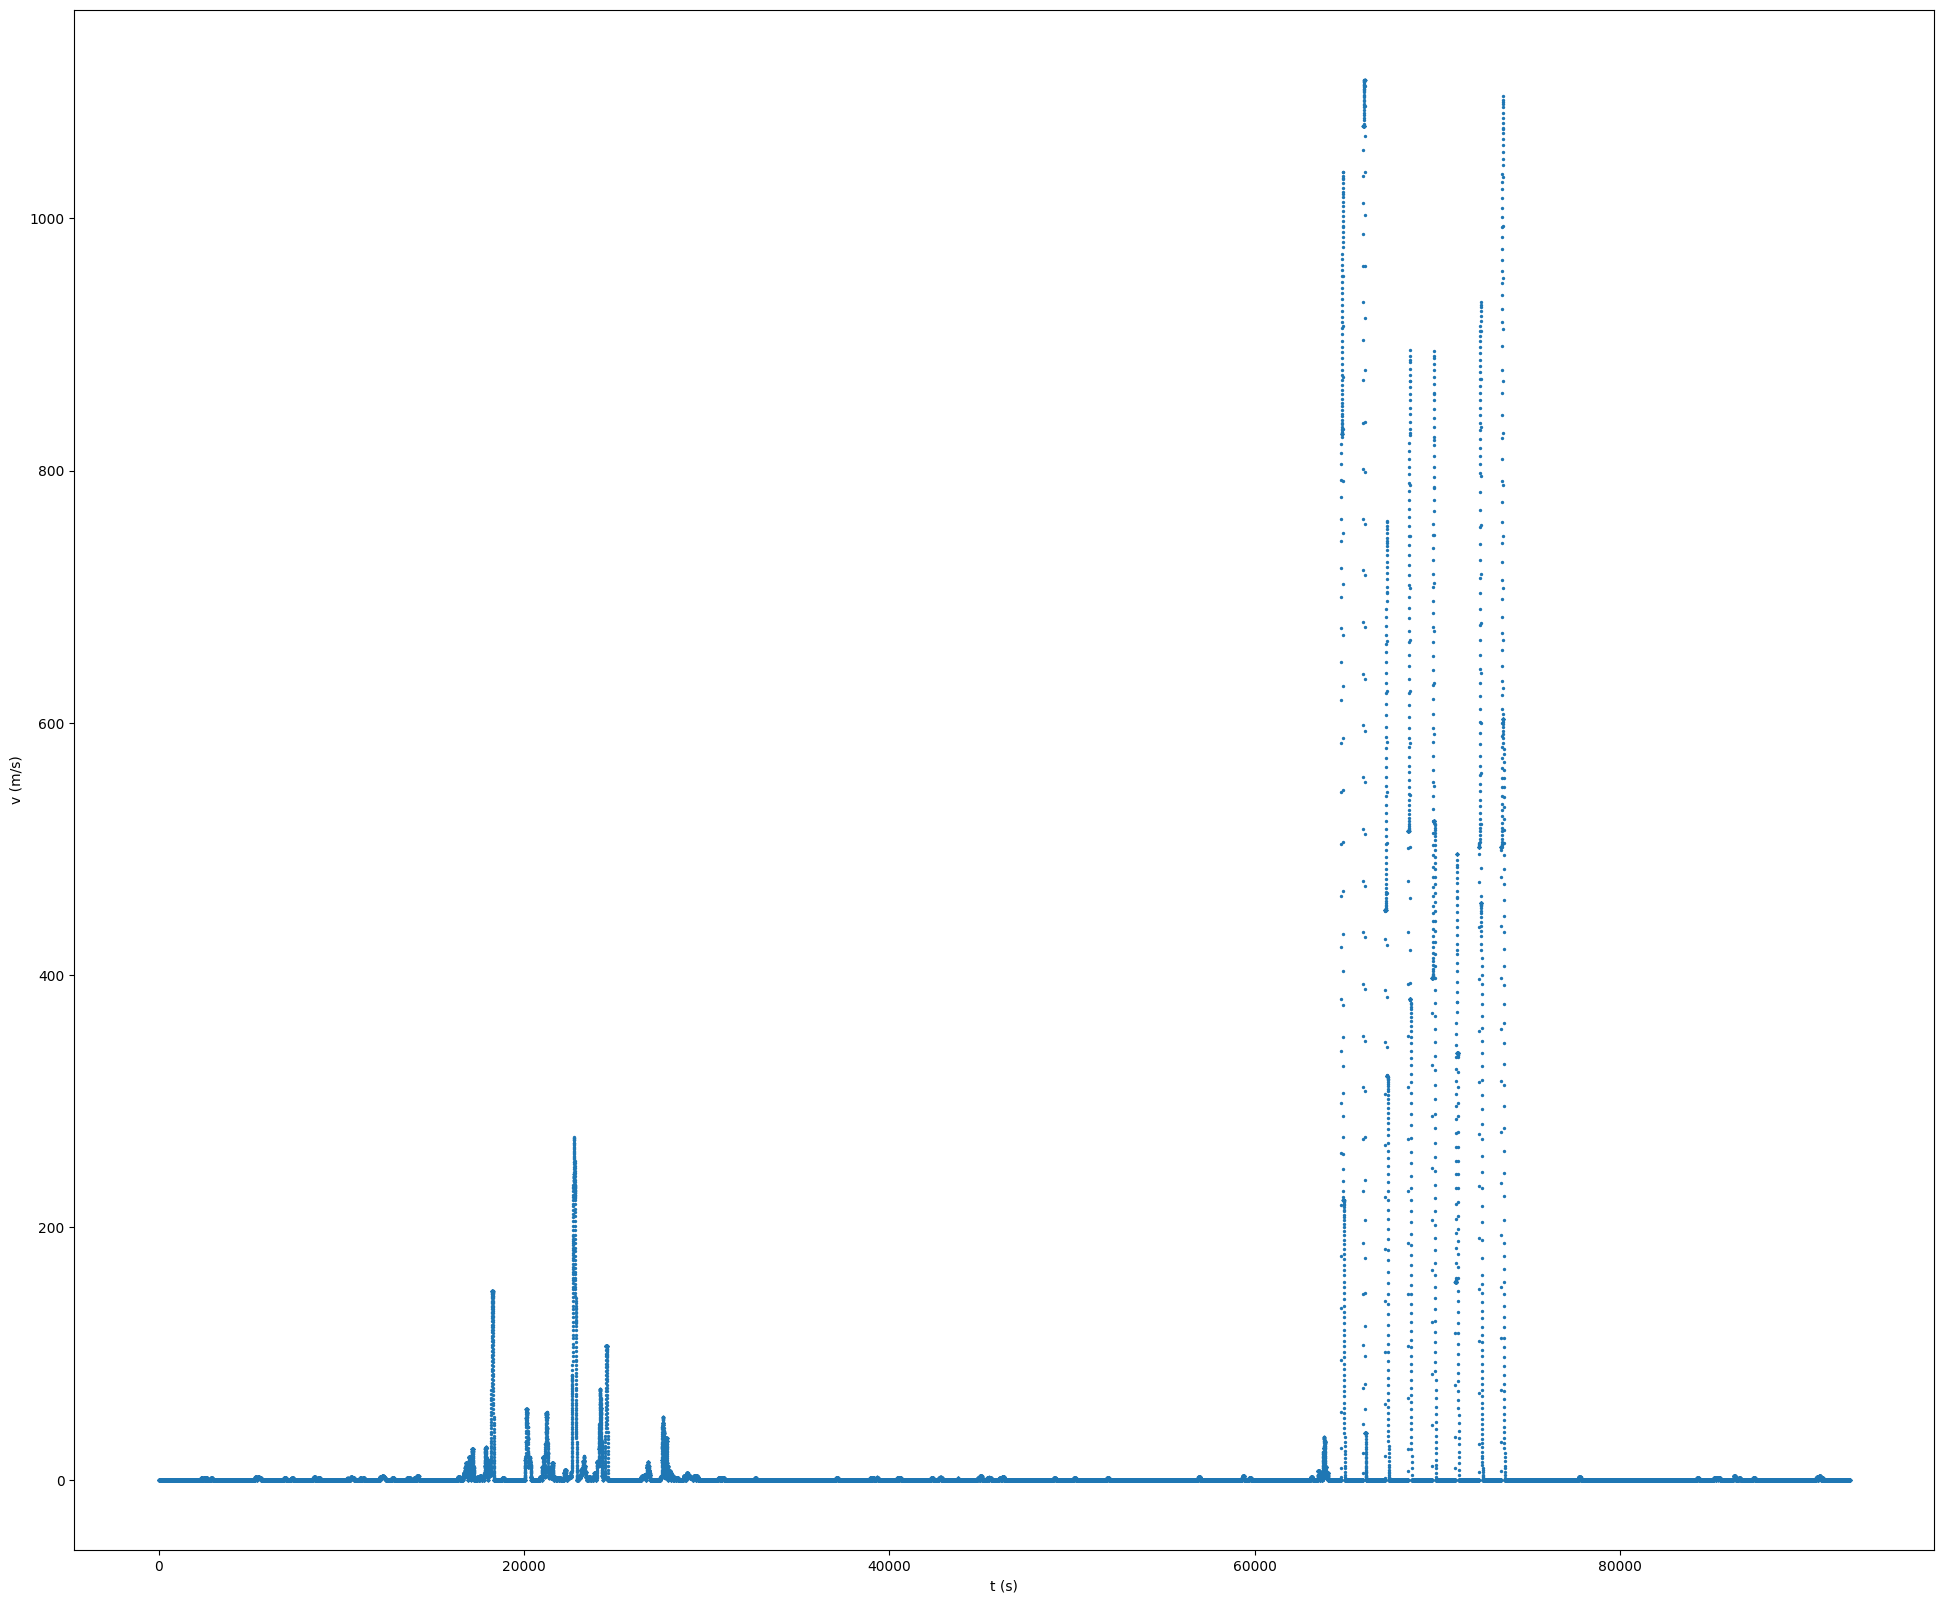

In [76]:
x=data_df["Time Elapsed (s)"]
y=data_df["Voltage"]
plt.figure(figsize=(24, 20))
#plt.ylim(-10,4000 )
#plt.xlim(38000, 41000)
plt.scatter(x,y, s=2)
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
#plt.plot(x,y, color='red', linewidth=0.2)
#plt.show()

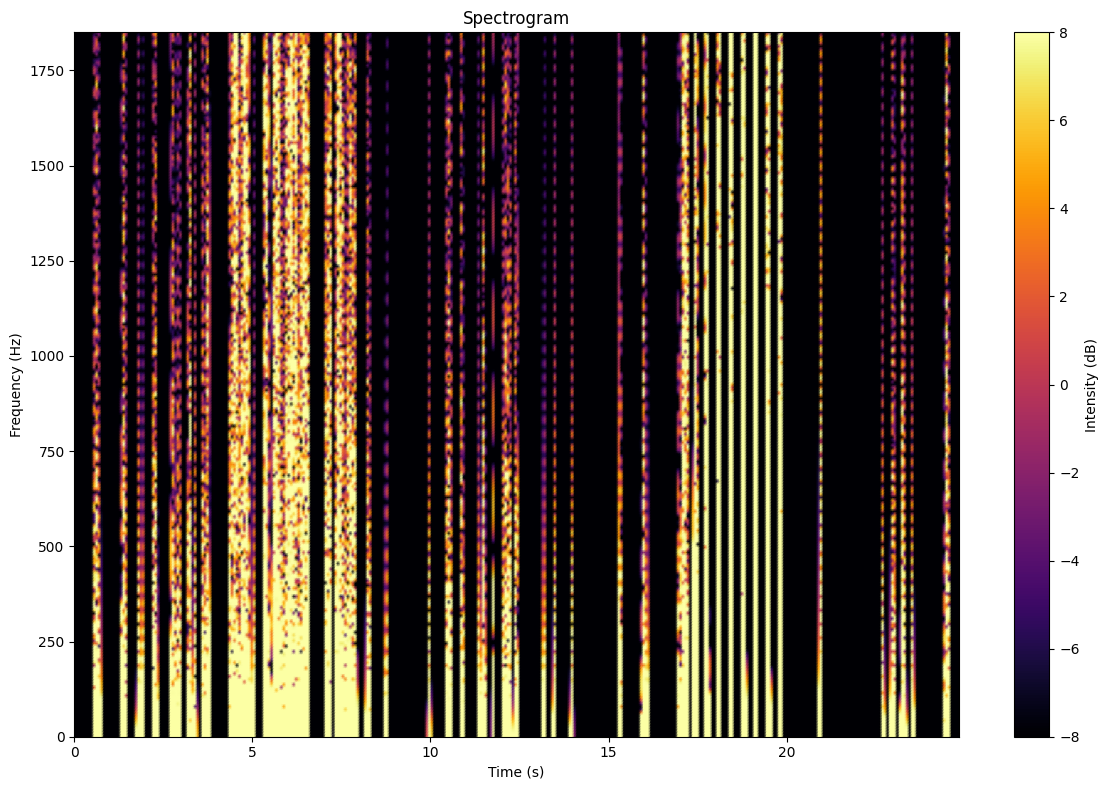

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.colors import Normalize

# Load your CSV file
data = pd.read_csv('AveragedTrial2.csv')

# Extract time elapsed iterations and voltage
iterations = data['Time Elapsed (s)'].values  # These are just iteration counts
voltage = data['Voltage'].values

# Sample rate is 3250 Hz
fs = 3700

# Calculate the actual time axis in seconds
actual_time = iterations / fs

# Convert voltage to tensor
waveform = tf.convert_to_tensor(voltage, dtype=tf.float32)

# Create spectrogram
def get_spectrogram(waveform):
    # Convert the waveform to a spectrogram via a STFT
    spectrogram = tf.signal.stft(
    waveform, frame_length=512, frame_step=256)

    # Obtain the magnitude of the STFT
    spectrogram = tf.abs(spectrogram)
    return spectrogram

spectrogram = get_spectrogram(waveform)


# Calculate time and frequency axes for plotting
num_frames = spectrogram.shape[0]
frame_step = 256
time_frames = np.arange(num_frames) * (frame_step / fs)
freq_bins = np.linspace(0, fs/2, spectrogram.shape[1])

# Plot the spectrogram
plt.figure(figsize=(12, 8))

#Convert to dB scale
spec_data = spectrogram.numpy()
# Add small epsilon to avoid log of zero
eps = np.finfo(float).eps
# Convert to dB: 20*log10(amplitude)
spec_db = 20 * np.log10(spec_data + eps)

# Focus on the -10 to 10 dB range
plt.pcolormesh(time_frames, freq_bins, spec_db.T,
               cmap='inferno',
               norm=Normalize(vmin=-8, vmax=8),  # Explicitly set the range to -10 to 10 dB
               shading='gouraud')

# Add a colorbar
cbar = plt.colorbar(label='Intensity (dB)')
cbar.set_ticks(np.arange(-8,9, 2))  # Set ticks every 2 dB from -10 to 10


plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram')
#plt.ylim(0, fs/2)  # Show full frequency range up to Nyquist frequency
plt.tight_layout()
plt.show()


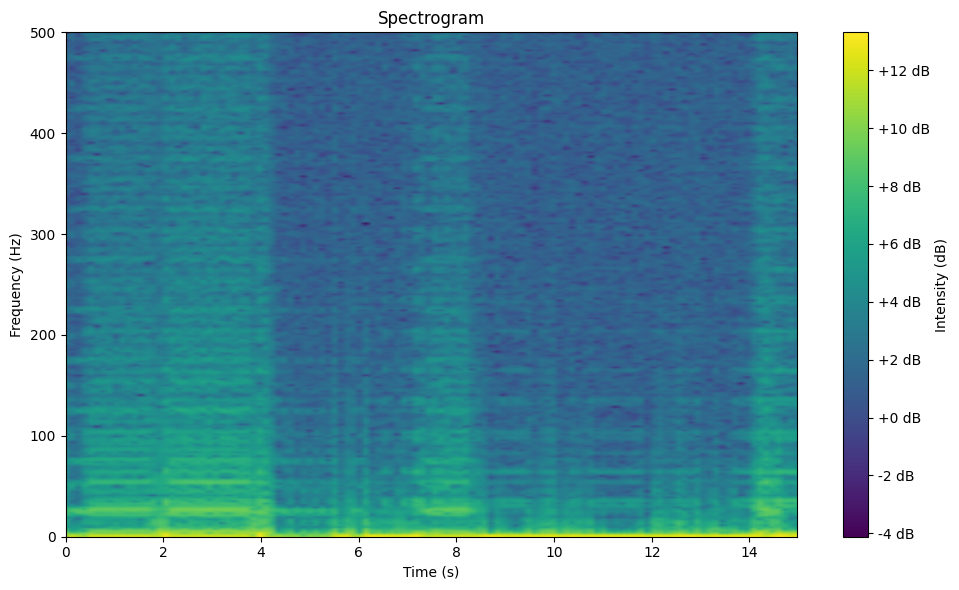

In [78]:


# Load your CSV file
data = pd.read_csv('FrequencyShowsUpUnpluggedTest.csv')

# Extract time elapsed iterations and voltage
iterations = data['Time Elapsed (s)'].values  # These are just iteration counts
voltage = data['Voltage'].values

# Sample rate is 3250 Hz
fs = 1000

# Calculate the actual time axis in seconds
actual_time = iterations / fs

# Convert voltage to tensor
waveform = tf.convert_to_tensor(voltage, dtype=tf.float32)

# Create spectrogram
def get_spectrogram(waveform):
    # Convert the waveform to a spectrogram via a STFT
    spectrogram = tf.signal.stft(
    waveform, frame_length=512, frame_step=256)

    # Obtain the magnitude of the STFT
    spectrogram = tf.abs(spectrogram)
    return spectrogram

spectrogram = get_spectrogram(waveform)


# Calculate time and frequency axes for plotting
num_frames = spectrogram.shape[0]
frame_step = 128
time_frames = np.arange(num_frames) * (frame_step / fs)
freq_bins = np.linspace(0, fs/2, spectrogram.shape[1])

# Plot the spectrogram
plt.figure(figsize=(10, 6))
# Convert to log scale for better visualization
log_spec = np.log(spectrogram.numpy() + np.finfo(float).eps)
plt.pcolormesh(time_frames, freq_bins, log_spec.T, shading='gouraud')
plt.colorbar(format='%+2.0f dB', label='Intensity (dB)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram')
#plt.ylim(0, fs/2)  # Show full frequency range up to Nyquist frequency
plt.tight_layout()
plt.show()
